# IPL Match

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

In [243]:
df=pd.read_csv("ipl_matches.csv")

# DataSet

In [244]:
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [245]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [246]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [247]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# DataCleaning

In [249]:
df.drop(['id', 'umpire1', 'umpire2', 'umpire3', 'dl_applied'], axis=1, inplace=True)

In [250]:
# Standardize team names
df['winner'] = df['winner'].replace({
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
})

In [251]:
df.isnull().sum()

Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [252]:
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [253]:
df["winner"]=df["winner"].fillna(df["winner"].mode()[0])

In [254]:
df["player_of_match"]=df["player_of_match"].fillna(df["player_of_match"].mode()[0])

In [255]:
df.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [256]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [257]:
df.to_csv("ipl_matchesData.csv",index=False)

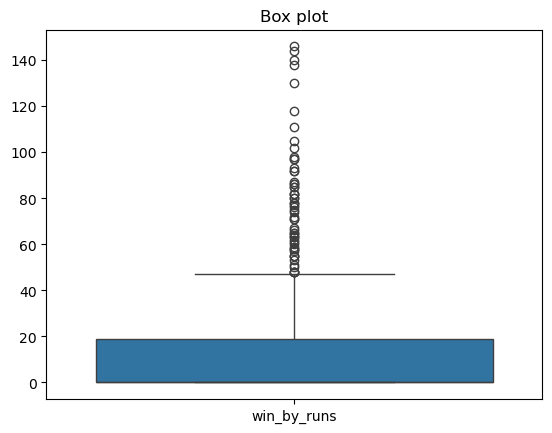

In [258]:
sns.boxplot(df[['win_by_runs']])
plt.title('Box plot')
plt.show()

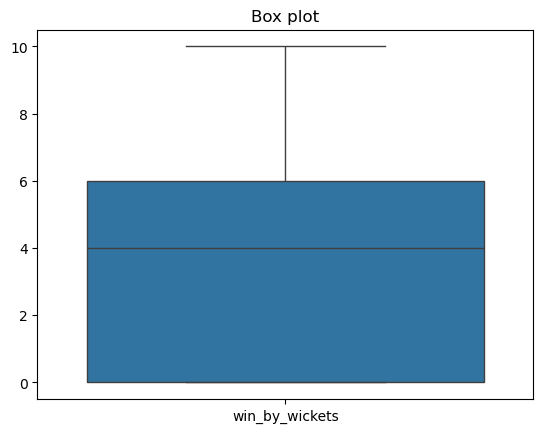

In [259]:
sns.boxplot(df[['win_by_wickets']])
plt.title('Box plot')
plt.show()

# EDA

# Univariate Analysis

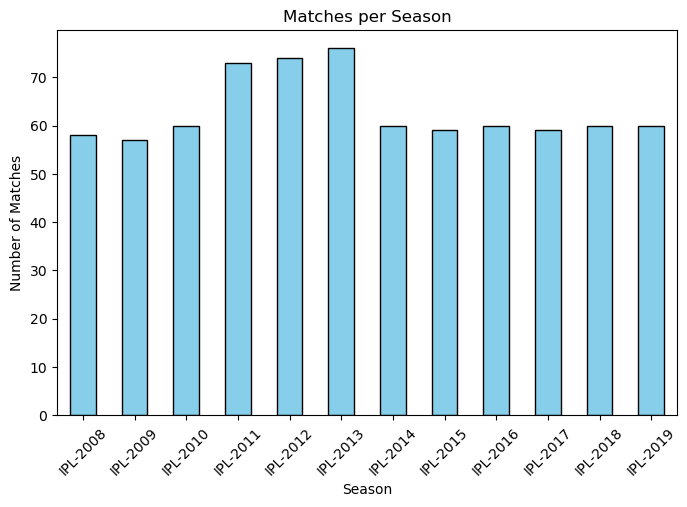

In [260]:
season_counts = df['Season'].value_counts().sort_index()

plt.figure(figsize=(8,5))
season_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

# Insights 
- Fewer matches in early years (~60).

- Big jump in 2011 because 2 new teams were added.

- Back to ~60 when those teams left or got suspended.


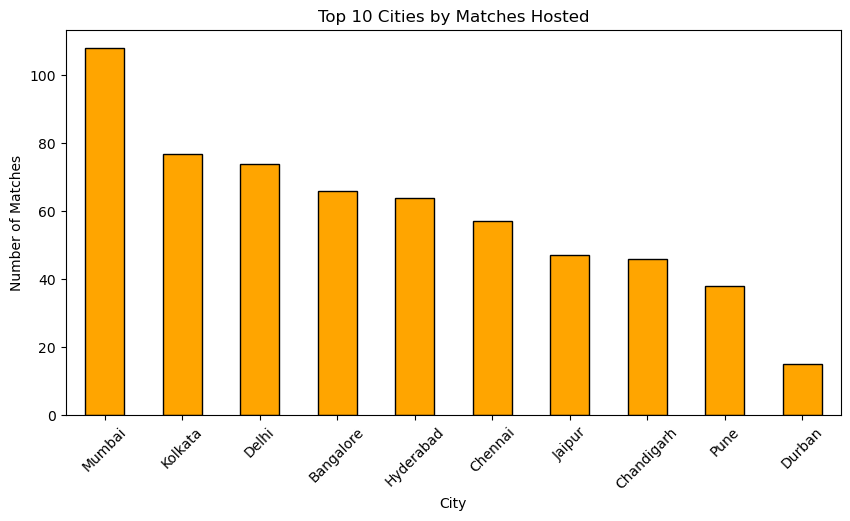

In [261]:
city_counts = df['city'].value_counts().head(10)

plt.figure(figsize=(10,5))
city_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Cities by Matches Hosted")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

# Insights
- Mumbai and Kolkata are usually at the top → Wankhede Stadium & Eden Gardens host many matches.

- Delhi, Bangalore, Chennai, and Hyderabad also rank high → all are home cities for popular franchises.

- Cities like Pune, Jaipur, and Ahmedabad appear due to hosting when other grounds were unavailable or during expansion years.

- Neutral venues (e.g., UAE cities during 2014/2020) may not show here since your dataset likely lists only Indian cities.

# Bivariate Analysis

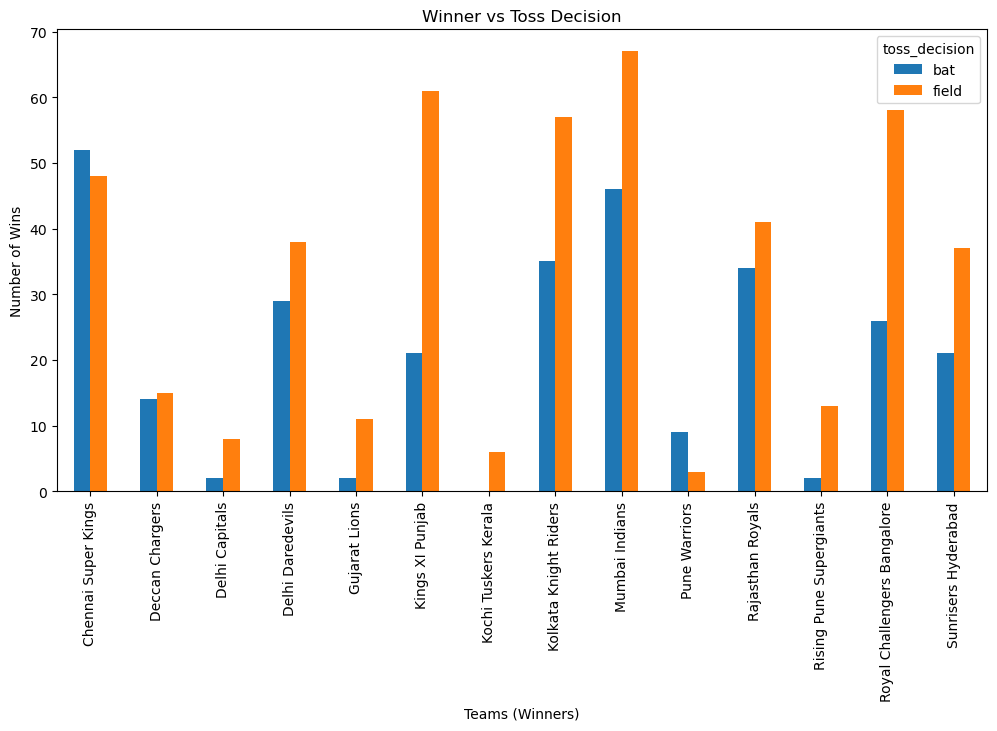

In [262]:
winner_vs_toss = pd.crosstab(df['winner'], df['toss_decision'])

winner_vs_toss.plot(kind='bar', figsize=(12,6))  
plt.title("Winner vs Toss Decision")
plt.xlabel("Teams (Winners)")
plt.ylabel("Number of Wins")
plt.xticks(rotation=90)
plt.show()

# Insights
- Most teams win more often when they choose to field first (chasing).

- A few strong teams (like CSK, MI) win in both batting and fielding, but chasing still has the edge.

- Smaller teams don’t show clear patterns because they had fewer matches.

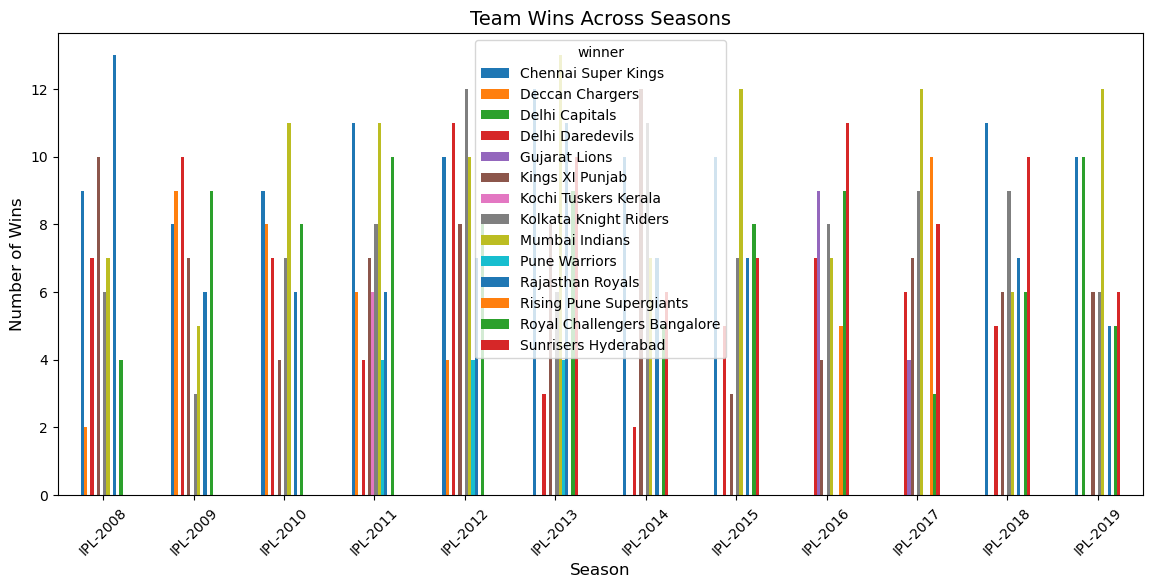

In [263]:
season_wins = pd.crosstab(df['Season'], df['winner'])

season_wins.plot(kind='bar', figsize=(14,6))

plt.title("Team Wins Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=45)
plt.show()



# Insight 
- CSK and MI win the most matches across many seasons.

- Other teams like KKR, SRH, RR have strong individual seasons.

- Short-lived teams (like Deccan Chargers, Gujarat Lions, Kochi Tuskers) appear only for a few years.

- Overall, the chart shows which team dominated each season.

# Multivariate Analysis

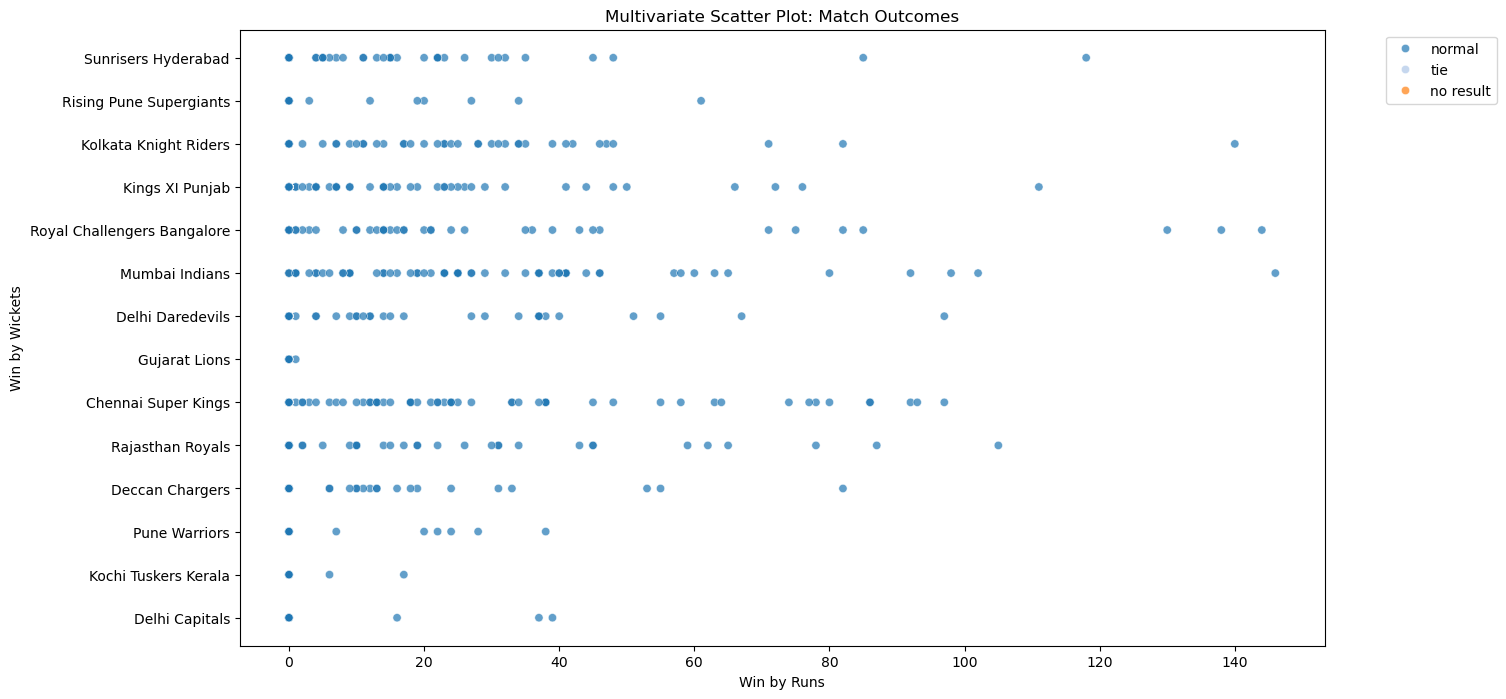

In [264]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    data=df,
    x='win_by_runs',         
    y='winner',       
    hue='result',            
    sizes=(20,200),          
    palette='tab20',
    alpha=0.7
)
plt.title("Multivariate Scatter Plot: Match Outcomes")
plt.xlabel("Win by Runs")
plt.ylabel("Win by Wickets")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Insights
- Teams high on the Y-axis are frequent winners.

- Points far right are dominant wins.

- Color shows result type.

- Horizontal spread shows consistency in performance.

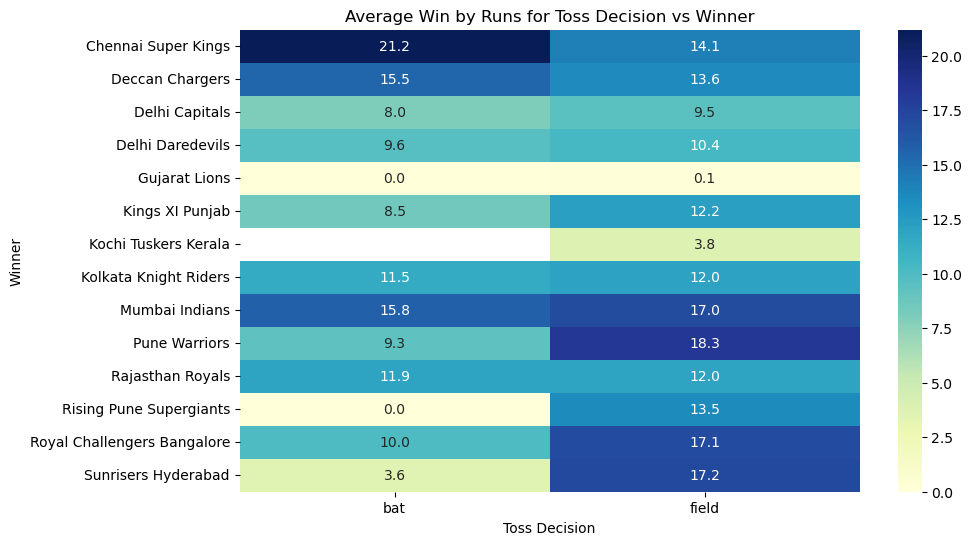

In [265]:
pivot = df.pivot_table(
    index='winner',
    columns='toss_decision',
    values='win_by_runs',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Win by Runs for Toss Decision vs Winner")
plt.xlabel("Toss Decision")
plt.ylabel("Winner")
plt.show()

# Insights
- Batting first → higher average win margins by runs (teams win by defending totals).

- Fielding first → low/near-zero margins (since chasing teams usually win by wickets, not runs).

- Team differences: Some teams show very high values in bat (strong at defending), while others stay low (win more by wickets).

# Encode categorical values

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Encode categorical values
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('winner', axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

# Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.2894736842105263
Classification Report:               precision    recall  f1-score   support

           0       0.39      0.35      0.37        26
           1       0.10      0.14      0.12         7
           2       0.00      0.00      0.00         1
           3       0.18      0.22      0.20         9
           4       0.00      0.00      0.00         4
           5       0.31      0.29      0.30        17
           7       0.33      0.27      0.30        22
           8       0.21      0.32      0.25        19
           9       0.00      0.00      0.00         4
          10       0.33      0.43      0.38        14
          11       0.00      0.00      0.00         5
          12       0.42      0.42      0.42        12
          13       0.29      0.33      0.31        12

    accuracy                           0.29       152
   macro avg       0.20      0.21      0.20       152
weighted avg       0.28      0.29      0.28       152

Confusi

# Decision tree

In [269]:
from sklearn.tree import DecisionTreeClassifier

model_Dt= DecisionTreeClassifier()
model_Dt.fit(X_train, y_train)
y_pred = model_Dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("cClassification Report",classification_report(y_test, y_pred))
print("Confusion matrix",confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 0.8552631578947368
cClassification Report               precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       1.00      1.00      1.00         7
           2       0.33      1.00      0.50         1
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00         4
           5       0.94      0.88      0.91        17
           6       0.00      0.00      0.00         0
           7       0.86      0.82      0.84        22
           8       0.74      0.89      0.81        19
           9       0.00      0.00      0.00         4
          10       0.93      0.93      0.93        14
          11       0.67      0.80      0.73         5
          12       0.79      0.92      0.85        12
          13       0.83      0.83      0.83        12

    accuracy                           0.86       152
   macro avg       0.72      0.77      0.73       152
weighted avg  

# Random forest

In [270]:
from sklearn.ensemble import RandomForestClassifier

model_RFC= RandomForestClassifier()
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report",classification_report(y_test, y_pred))
print("Confusion Matrix",confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.75
Classification Report               precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       0.75      0.43      0.55         7
           2       0.00      0.00      0.00         1
           3       0.46      0.67      0.55         9
           4       1.00      0.75      0.86         4
           5       0.73      0.65      0.69        17
           7       0.89      0.73      0.80        22
           8       0.52      0.89      0.65        19
           9       0.00      0.00      0.00         4
          10       0.86      0.86      0.86        14
          11       1.00      0.20      0.33         5
          12       0.85      0.92      0.88        12
          13       0.89      0.67      0.76        12

    accuracy                           0.75       152
   macro avg       0.68      0.60      0.61       152
weighted avg       0.77      0.75      0.74       152

Confusion Matrix [[26  0  0 

# Support Vector Machine

In [271]:
from sklearn.svm import SVC

model_SVC= SVC()
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("classification report",classification_report(y_test, y_pred))
print("confusion matrix",confusion_matrix(y_test, y_pred))


SVM Accuracy: 0.11842105263157894
classification report               precision    recall  f1-score   support

           0       0.13      0.08      0.10        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        22
           8       0.12      0.84      0.21        19
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        12

    accuracy                           0.12       152
   macro avg       0.02      0.07      0.02       152
weighted avg       0.04      0.12      0.04       152

confusion matrix [[ 2  

# K-Nearest Neighbours

In [272]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN= KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("classification report",classification_report(y_test, y_pred))
print("Confusion matrix",confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.19078947368421054
classification report               precision    recall  f1-score   support

           0       0.41      0.46      0.44        26
           1       0.14      0.14      0.14         7
           2       0.00      0.00      0.00         1
           3       0.12      0.22      0.16         9
           4       0.00      0.00      0.00         4
           5       0.20      0.18      0.19        17
           7       0.25      0.18      0.21        22
           8       0.14      0.16      0.15        19
           9       0.00      0.00      0.00         4
          10       0.19      0.21      0.20        14
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        12
          13       0.17      0.08      0.11        12

    accuracy                           0.19       152
   macro avg       0.13      0.13      0.12       152
weighted avg       0.19      0.19      0.19       152

Confusion matrix [[12  

# XG Boost

In [273]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create model
model_XGB= xgb.XGBClassifier()

# Train
model_XGB.fit(X_train, y_train)

# Predict
y_pred = model_XGB.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


XGBoost Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         4
           5       1.00      0.94      0.97        17
           7       0.96      1.00      0.98        22
           8       0.95      1.00      0.97        19
           9       1.00      0.50      0.67         4
          10       0.93      1.00      0.97        14
          11       1.00      0.20      0.33         5
          12       0.80      1.00      0.89        12
          13       0.92      0.92      0.92        12

    accuracy                           0.95       152
   macro avg       0.96      0.89      0.90       152
weighted avg       0.95      0.95      0.94       152

[[26  0  0  0  0  0  0  0  0  0  0  0  0]


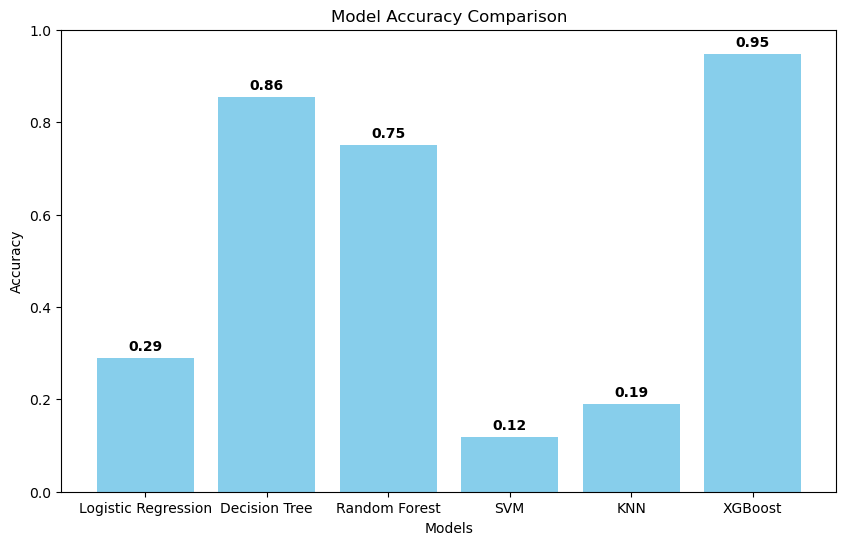

In [274]:
from sklearn.metrics import accuracy_score

# Collect accuracy scores of all models
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, model_LR.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, model_Dt.predict(X_test)),
    'Random Forest': accuracy_score(y_test, model_RFC.predict(X_test)),
    'SVM': accuracy_score(y_test, model_SVC.predict(X_test)),
    'KNN': accuracy_score(y_test, model_KNN.predict(X_test)),
    'XGBoost': accuracy_score(y_test, model_XGB.predict(X_test))
}

# Prepare data for plotting
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontweight='bold')

plt.show()


In [275]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Create XGBoost classifierxgb_model = xgb.XGBClassifier(
    use_label_encoder=False,  # To avoid warning
    eval_metric='mlogloss'    # For classification
)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.predict(X_test)

# Evaluation
print("XGBoost Accuracy (GridSearchCV):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
XGBoost Accuracy (GridSearchCV): 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        19
           9       1.00      0.75      0.86         4
          10       0.93      1.00      0.97        14
          11       1.00      0.40      0.57         5
          12       0.92      1.00      0.96        12
          13       0.92      1.00      0.96      

In [276]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,             # Number of random parameter combinations
    scoring='accuracy',
    cv=3,                  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict with best estimator
y_pred = random_search.predict(X_test)

# Evaluation
print("XGBoost Accuracy (RandomizedSearchCV):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.9, 'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
XGBoost Accuracy (RandomizedSearchCV): 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         4
           5       1.00      0.94      0.97        17
           7       0.96      1.00      0.98        22
           8       0.95      0.95      0.95        19
           9       1.00      0.50      0.67         4
          10       0.93      1.00      0.97        14
          11       1.00      0.20      0.33         5
          12       0.86      1.00     

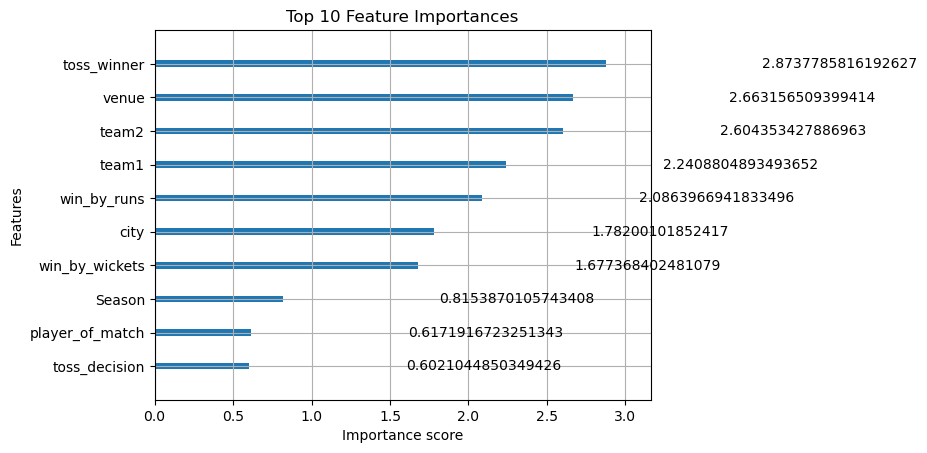

In [277]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()


In [278]:
import joblib
joblib.dump(best_model, "xgb_best_model.pkl")


['xgb_best_model.pkl']